In [721]:
# Libraries

import numpy as np
import pandas as pd                         
import matplotlib.pyplot as plt



import datetime as dt


#regression and visualization Libraries
import sklearn
import scipy
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [722]:
df = pd.read_csv('C:/Users/danie/Downloads/new/DataMining/Data mining assignment 1/EnergyProduction.csv')  #Loads the csv.
df #Displays the dataset 

,DATE,EnergyIndex
0,1970-01-01,43.0869
1,1970-02-01,42.5577
2,1970-03-01,41.6215
3,1970-04-01,40.1982
4,1970-05-01,39.9321
...,...,...
235,1989-08-01,75.2704
236,1989-09-01,69.5107
237,1989-10-01,66.0620
238,1989-11-01,69.2555


In [723]:
for current in range(0,240): #Range of all the rows excepts the headings
    errorcheckEnergy = isinstance(df['EnergyIndex'][current], float) #Returns a true or false statement depending on if the variable type is a float if matches it is true
    errorcheckDate = isinstance(df['DATE'][current], str)#Returns a true or false statement depending on if the variable type is a string if matches it is true

if (errorcheckEnergy == False): #If the EnergyIndex row was the incorrect variable 
     print("There Where Data Errors of EnergyIndex Column") #Alerts if there is a error
else:
    print("All Entries of EnergyIndex Column Are Valid Floats") #Alerts if all rows are correct
    
if (errorcheckDate == False): #If the DATE row was the incorrect variable 
     print("There Where Data Errors of DATE Column") #Alerts if there is a error
else:
    print("All Entries of DATE Column Are Valid Dates") #Alerts if all rows are correct

All Entries of EnergyIndex Column Are Valid Floats
All Entries of DATE Column Are Valid Dates


In [724]:
df = pd.read_csv('C:/Users/danie/Downloads/new/DataMining/Data mining assignment 1/EnergyProduction.csv',index_col='DATE', parse_dates=True)  #Reloads the csv and uses DATE column as a Index. parse_dates is true for modelling 
df.dropna(inplace=True) #Dropna is used to get rid of any missing values within the dataset
df.index #Show the index of the dataset

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [725]:
df.index.freq = 'MS' #Changes the frequency to month start 
df.index #Show the index of the dataset

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

In [726]:
df #Displays the dataset 

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321
...,...
1989-08-01,75.2704
1989-09-01,69.5107
1989-10-01,66.0620


In [727]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing #Library for holt winters to use triple exponential smoothing
df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'], trend='mul', seasonal ='mul',seasonal_periods=12).fit().fittedvalues.shift(-1) #Creates a new column that shows triple exponential smoothing was used with multiplicative values using the holt-winters method 
df.dropna(inplace=True) #Dropna is used to get rid of any missing values within the dataset. this is used again because without it the last value for multiplicative column will have missing data
df.head() #Displays the first five rows within the dataset

,EnergyIndex,TESmul12
DATE,,
1970-01-01,43.0869,41.068159
1970-02-01,42.5577,39.724743
1970-03-01,41.6215,37.961982
1970-04-01,40.1982,38.600731
1970-05-01,39.9321,42.335711


Text(0, 0.5, 'EnergyIndex')

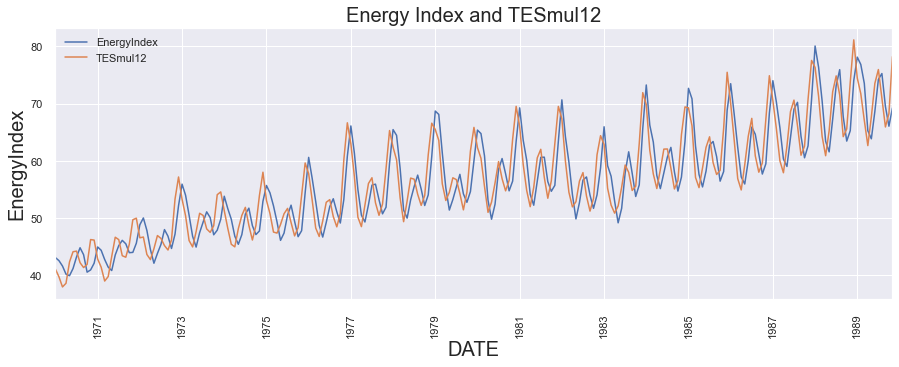

In [728]:
df[['EnergyIndex', 'TESmul12']].plot(figsize=(15,5)).autoscale(axis='x', tight=True);  #Plots the values from EnergyIndex and TESmul12 
plt.title('Energy Index and TESmul12', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20) #X Axis title  
plt.xticks(rotation=90)#Rotates the dates to fit better
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title

Text(0, 0.5, 'EnergyIndex')

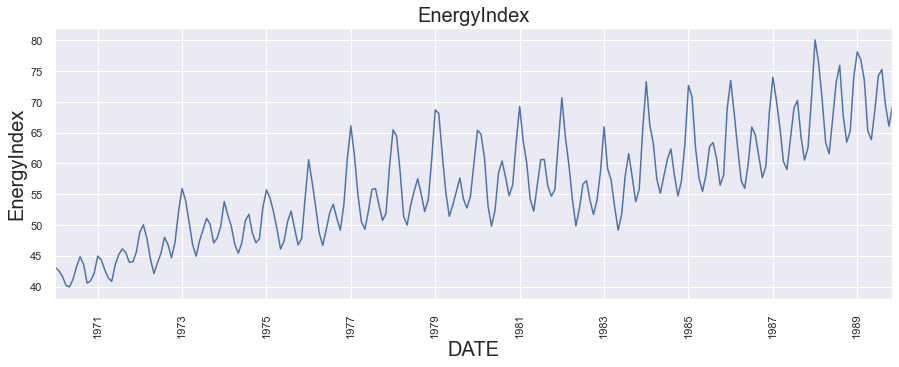

In [729]:
df['EnergyIndex'].plot(figsize=(15,5)).autoscale(axis='x', tight=True); #Plots the values from EnergyIndex 
plt.title('EnergyIndex', fontsize =20)  #Displays a Title
plt.xlabel('DATE', fontsize=20) #X Axis title  
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title

Text(0, 0.5, 'TESmul12')

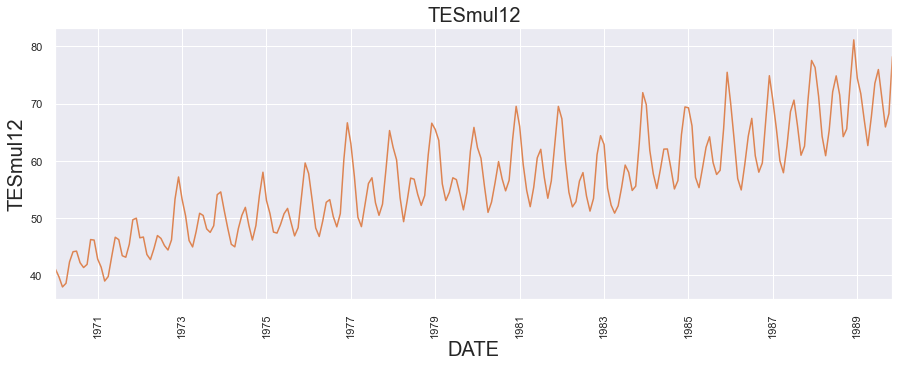

In [730]:
df['TESmul12'].plot(figsize=(15,5), color = "#dd8452").autoscale(axis='x', tight=True); #Plots the values from TESmul12 
plt.title('TESmul12', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20) #X Axis title  
plt.xticks(rotation=90)  #Rotates the dates to fit better
plt.ylabel('TESmul12',fontsize =20) #Y Axis title

Text(0, 0.5, 'EnergyIndex')

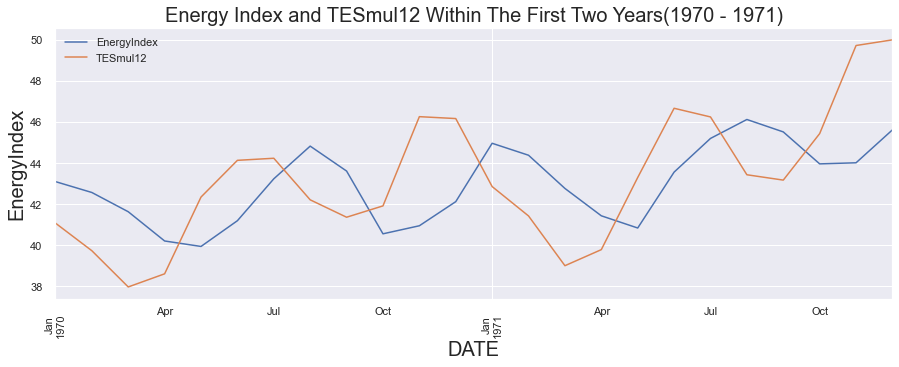

In [731]:
df[['EnergyIndex', 'TESmul12']].iloc[:24].plot(figsize=(15,5)).autoscale(axis='x', tight=True); #Plots the values from EnergyIndex and TESmul12 for the first two years
plt.title('Energy Index and TESmul12 Within The First Two Years(1970 - 1971)', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20)  #X Axis title
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title

Text(0, 0.5, 'EnergyIndex')

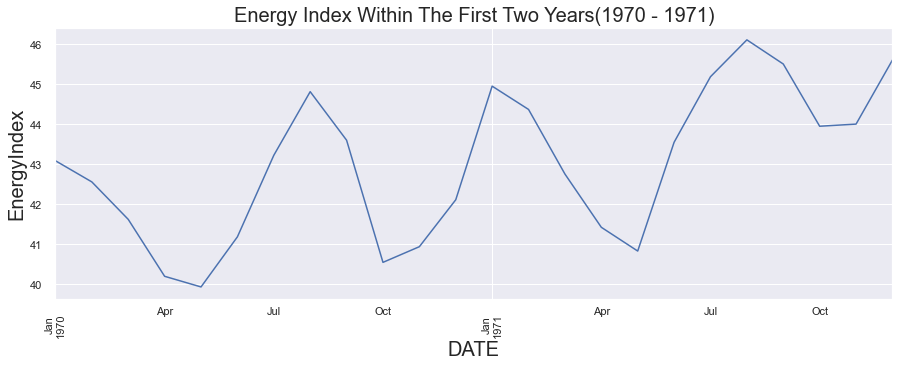

In [732]:
df['EnergyIndex'].iloc[:24].plot(figsize=(15,5)).autoscale(axis='x', tight=True); #Plots the values from EnergyIndex for the first two years
plt.title('Energy Index Within The First Two Years(1970 - 1971)', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20) #X Axis title
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title

Text(0, 0.5, 'TESmul12')

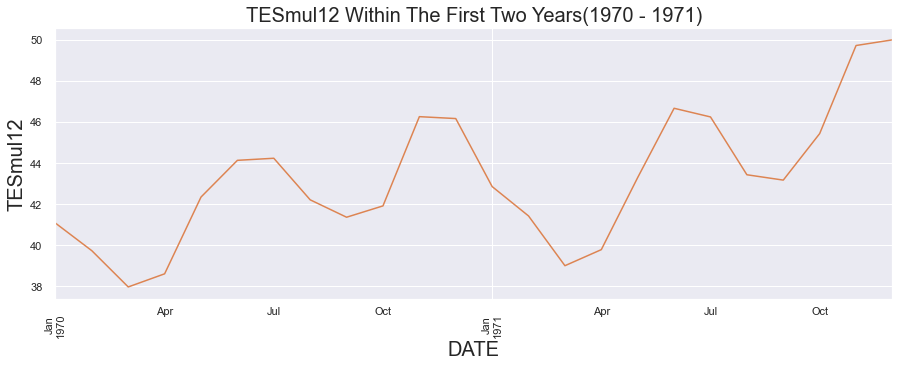

In [733]:
df['TESmul12'].iloc[:24].plot(figsize=(15,5), color = "#dd8452").autoscale(axis='x', tight=True); #Plots the values from TESmul12 for the first two years
plt.title('TESmul12 Within The First Two Years(1970 - 1971)', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20) #X Axis title
plt.xticks(rotation=90)  #Rotates the dates to fit better
plt.ylabel('TESmul12',fontsize =20) #Y Axis title

Text(0, 0.5, 'EnergyIndex')

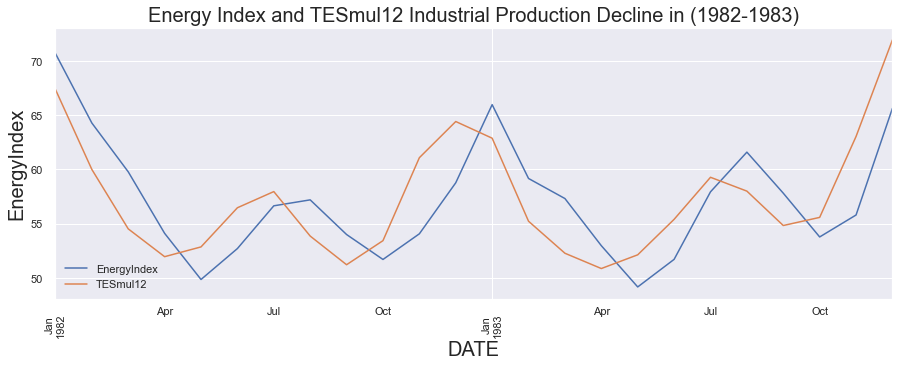

In [734]:
df["1982-01-01":"1983-12-01"].plot(figsize=(15,5))  #Plots the values from EnergyIndex and TESmul12 between 1982 and 1983
plt.title('Energy Index and TESmul12 Industrial Production Decline in (1982-1983)', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20) #X Axis title
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title

Text(0, 0.5, 'EnergyIndex')

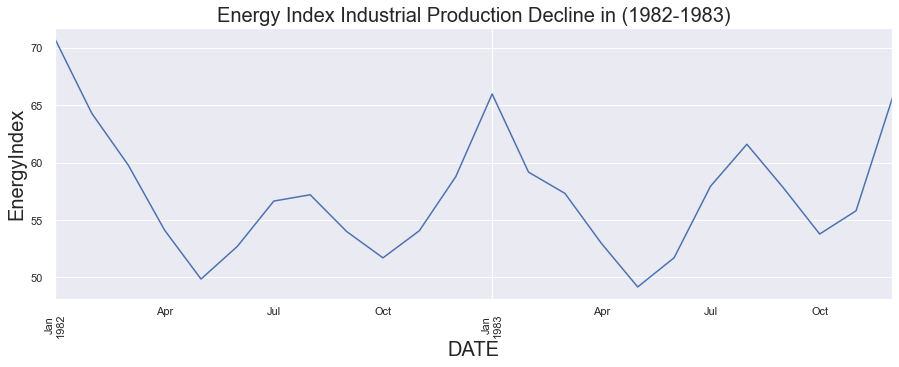

In [735]:
df['EnergyIndex']["1982-01-01":"1983-12-01"].plot(figsize=(15,5)) #Plots the values from EnergyIndex between 1982 and 1983
plt.title('Energy Index Industrial Production Decline in (1982-1983)', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20)  #X Axis title
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title

Text(0, 0.5, 'TESmul12')

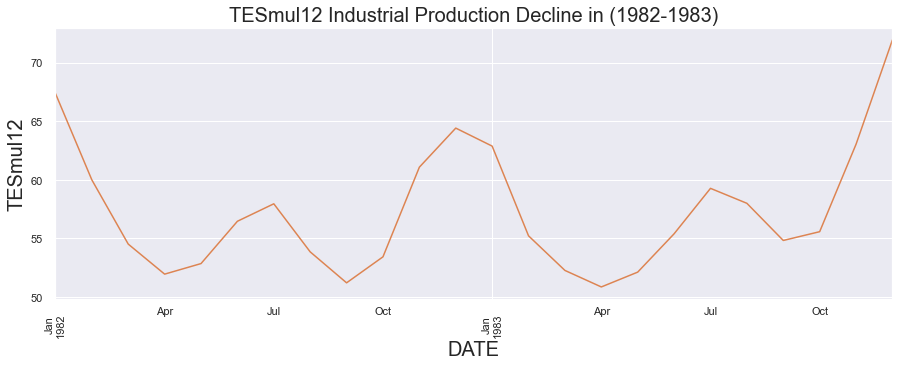

In [736]:
df['TESmul12']["1982-01-01":"1983-12-01"].plot(figsize=(15,5),color = "#dd8452") #Plots the values from TESmul12 between 1982 and 1983
plt.title('TESmul12 Industrial Production Decline in (1982-1983)', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20)  #X Axis title
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.ylabel('TESmul12',fontsize =20) #Y Axis title

Text(0, 0.5, 'EnergyIndex')

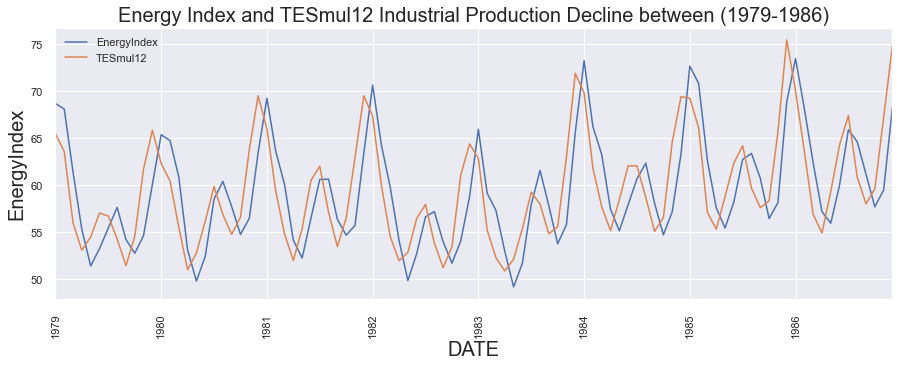

In [737]:
df["1979-01-01":"1986-12-01"].plot(figsize=(15,5)) #Plots the values from EnergyIndex and TESmul12 between 1979 and 1986
plt.title('Energy Index and TESmul12 Industrial Production Decline between (1979-1986)', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20) #X Axis title
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title

Text(0, 0.5, 'EnergyIndex')

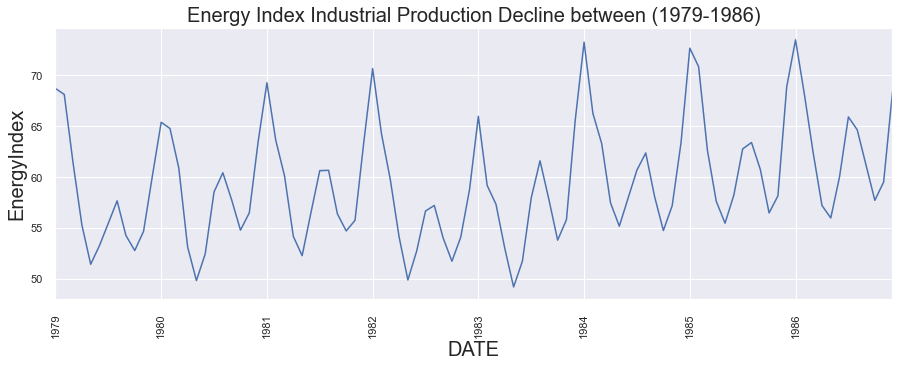

In [738]:
df['EnergyIndex']["1979-01-01":"1986-12-01"].plot(figsize=(15,5))  #Plots the values from EnergyIndex between 1979 and 1986
plt.title('Energy Index Industrial Production Decline between (1979-1986)', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20) #X Axis title
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title

Text(0, 0.5, 'TESmul12')

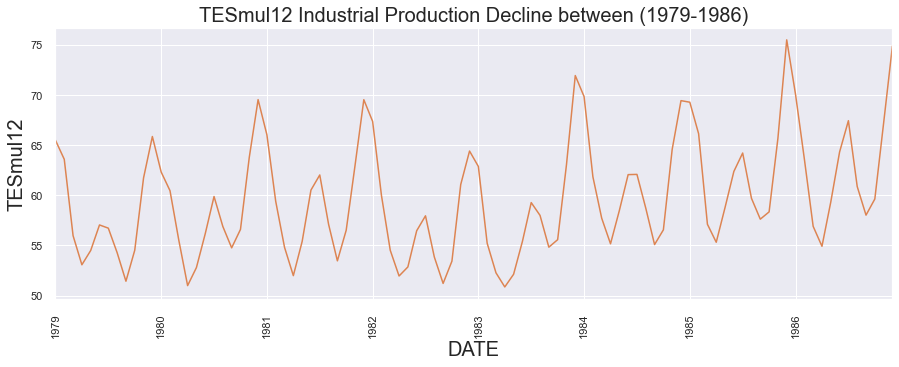

In [739]:
df['TESmul12']["1979-01-01":"1986-12-01"].plot(figsize=(15,5), color = "#dd8452") #Plots the values from EnergyIndex and TESmul12 between 1979 and 1986
plt.title('TESmul12 Industrial Production Decline between (1979-1986)', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20) #X Axis title
plt.xticks(rotation=90)  #Rotates the dates to fit better
plt.ylabel('TESmul12',fontsize =20) #Y Axis title

Text(0, 0.5, 'EnergyIndex')

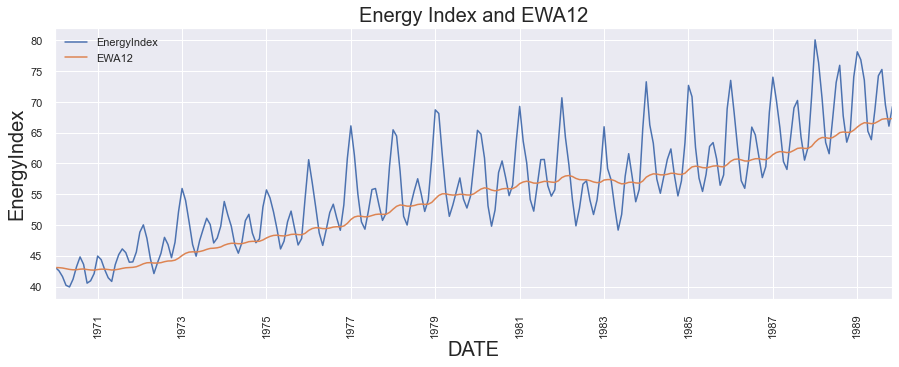

In [740]:
df['EWA12'] = df['EnergyIndex'].ewm(span=50,adjust=False).mean()
df[['EnergyIndex', 'EWA12']].plot(figsize=(15,5)).autoscale(axis='x', tight=True);  #Plots the values from EnergyIndex and EWA12 
plt.title('Energy Index and EWA12', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20) #X Axis title  
plt.xticks(rotation=90)#Rotates the dates to fit better
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title

Text(0, 0.5, 'EnergyIndex')

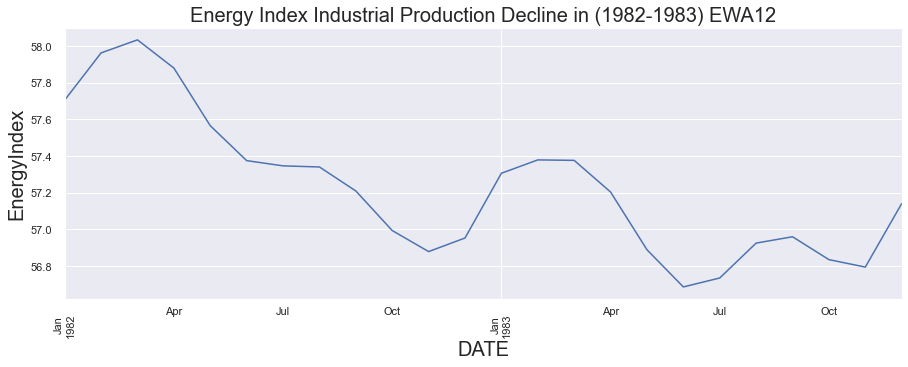

In [741]:
df['EWA12']["1982-01-01":"1983-12-01"].plot(figsize=(15,5)) #Plots the values from EnergyIndex between 1982 and 1983
plt.title('Energy Index Industrial Production Decline in (1982-1983) EWA12', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20)  #X Axis title
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title

Text(0, 0.5, 'EnergyIndex')

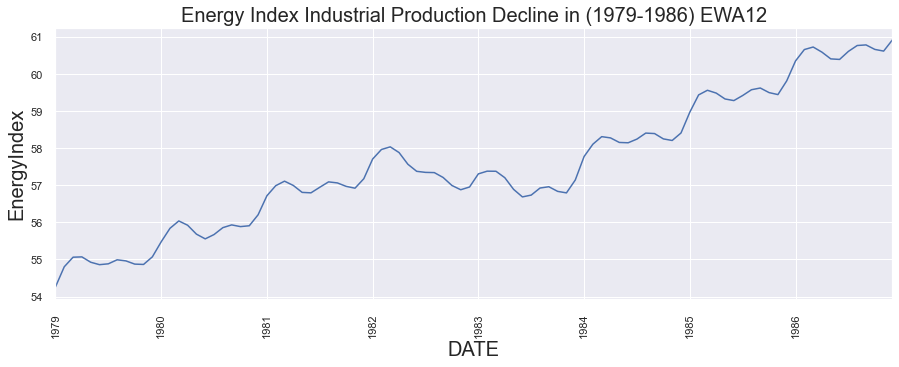

In [742]:
df['EWA12']["1979-01-01":"1986-12-01"].plot(figsize=(15,5)) #Plots the values from EnergyIndex between 1982 and 1983
plt.title('Energy Index Industrial Production Decline in (1979-1986) EWA12', fontsize =20) #Displays a Title
plt.xlabel('DATE', fontsize=20)  #X Axis title
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title

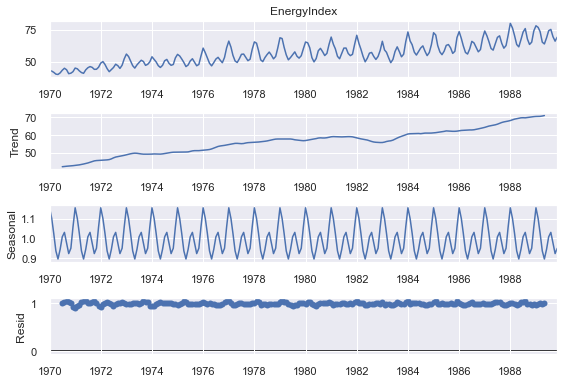

In [743]:
from statsmodels.tsa.seasonal import seasonal_decompose #Library for seasonal decompose
result = seasonal_decompose(df['EnergyIndex'], model='multiplicative') #seasonal decopose of EnergyIndex using multiplicative
result.plot(); #Plots the trend,seasonal and resid

In [744]:
df.describe() # Describes the dataset

,EnergyIndex,TESmul12,EWA12
count,239.000000,239.000000,239.000000
mean,56.385454,56.544193,53.903054
std,8.879487,8.991213,7.004002
min,39.932100,37.961982,42.667265
25%,49.798800,50.209636,47.730377
50%,55.515600,55.577335,55.070404
75%,62.619250,62.625604,58.405235
max,80.083300,81.158095,67.302965


In [745]:
df#Displays the dataset 

,EnergyIndex,TESmul12,EWA12
DATE,,,
1970-01-01,43.0869,41.068159,43.086900
1970-02-01,42.5577,39.724743,43.066147
1970-03-01,41.6215,37.961982,43.009494
1970-04-01,40.1982,38.600731,42.899247
1970-05-01,39.9321,42.335711,42.782889
...,...,...,...
1989-07-01,74.2491,75.967368,66.848987
1989-08-01,75.2704,70.881260,67.179239
1989-09-01,69.5107,65.929049,67.270669


In [746]:
df = pd.read_csv('C:/Users/danie/Downloads/new/DataMining/Data mining assignment 1/EnergyProduction.csv', parse_dates=True) #Reloads the csv and removes the DATE index so it can be called easily parse_dates is true for modelling 
df.dropna(inplace=True) #Dropna is used to get rid of any missing values within the dataset
df#Displays the dataset 


,DATE,EnergyIndex
0,1970-01-01,43.0869
1,1970-02-01,42.5577
2,1970-03-01,41.6215
3,1970-04-01,40.1982
4,1970-05-01,39.9321
...,...,...
235,1989-08-01,75.2704
236,1989-09-01,69.5107
237,1989-10-01,66.0620
238,1989-11-01,69.2555


In [747]:
df['pass'] = pd.DatetimeIndex(df['DATE']).values #This is only used because there is a error if DATE is used when plotting all the dates will very close this fixes that
y = df['EnergyIndex'] #Assigns EnergyIndex to y
x1 = df['pass'] #Assigns pass to x1
df #Displays the dataset

,DATE,EnergyIndex,pass
0,1970-01-01,43.0869,1970-01-01
1,1970-02-01,42.5577,1970-02-01
2,1970-03-01,41.6215,1970-03-01
3,1970-04-01,40.1982,1970-04-01
4,1970-05-01,39.9321,1970-05-01
...,...,...,...
235,1989-08-01,75.2704,1989-08-01
236,1989-09-01,69.5107,1989-09-01
237,1989-10-01,66.0620,1989-10-01
238,1989-11-01,69.2555,1989-11-01


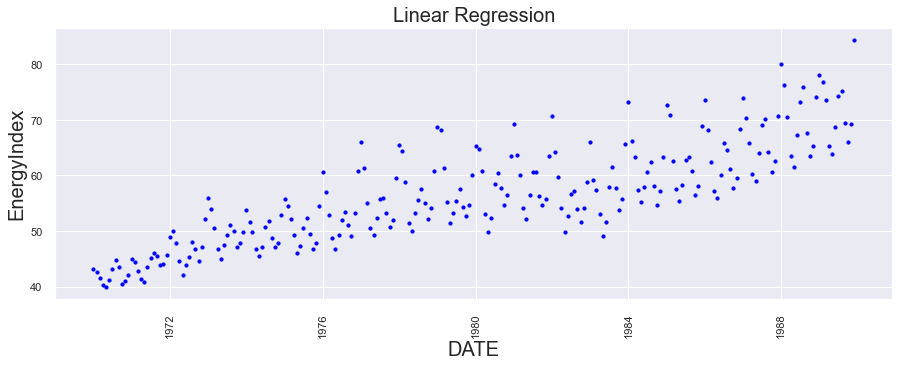

In [748]:
plt.figure(figsize=(15,5)) #sets the figure size
plt.xlabel('DATE', fontsize=20) #X Axis title
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title
plt.scatter(x1,y, s=10, c='blue') #Sets scatter plot
plt.title('Linear Regression',fontsize =20) #Displays a Title
plt.show() #Shows the plot


In [749]:
del df['pass'] #Deletes the pass column
df #Displays the dataset

,DATE,EnergyIndex
0,1970-01-01,43.0869
1,1970-02-01,42.5577
2,1970-03-01,41.6215
3,1970-04-01,40.1982
4,1970-05-01,39.9321
...,...,...
235,1989-08-01,75.2704
236,1989-09-01,69.5107
237,1989-10-01,66.0620
238,1989-11-01,69.2555


In [750]:
lst = [] #Creates a list
for x in range(1, 241): #Creates a variable to show how many months have passed 
    lst.append(x) #Adds that month value to the list
df['monthindex'] = lst #Creates a new column for the the number of months that have passed
df #Displays the dataset

,DATE,EnergyIndex,monthindex
0,1970-01-01,43.0869,1
1,1970-02-01,42.5577,2
2,1970-03-01,41.6215,3
3,1970-04-01,40.1982,4
4,1970-05-01,39.9321,5
...,...,...,...
235,1989-08-01,75.2704,236
236,1989-09-01,69.5107,237
237,1989-10-01,66.0620,238
238,1989-11-01,69.2555,239


In [751]:
x1 = df['monthindex'] #Makes the variable x1 equal to the monthindex column

df #Displays the dataset

,DATE,EnergyIndex,monthindex
0,1970-01-01,43.0869,1
1,1970-02-01,42.5577,2
2,1970-03-01,41.6215,3
3,1970-04-01,40.1982,4
4,1970-05-01,39.9321,5
...,...,...,...
235,1989-08-01,75.2704,236
236,1989-09-01,69.5107,237
237,1989-10-01,66.0620,238
238,1989-11-01,69.2555,239


In [752]:
x = sm.add_constant(x1) #Adds a constant 
results = sm.OLS(y,x).fit() #Makes results estimate coefficients
results.summary() #Displays a summary 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            EnergyIndex   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     549.2
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           9.29e-64
Time:                        22:15:24   Log-Likelihood:                -724.99
No. Observations:                 240   AIC:                             1454.
Df Residuals:                     238   BIC:                             1461.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.3914      0.645     67.240      0.000      42.120      44.663
monthindex     0.1088      0.005     23.435      0.000       0.100       0.118
==============================================================================
Omnibus:                       14.965   Durbin-Watson:                   0.721
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.085
Skew:                           0.626   Prob(JB):                     0.000321
Kurtosis:                       3.207   Cond. No.                         279.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

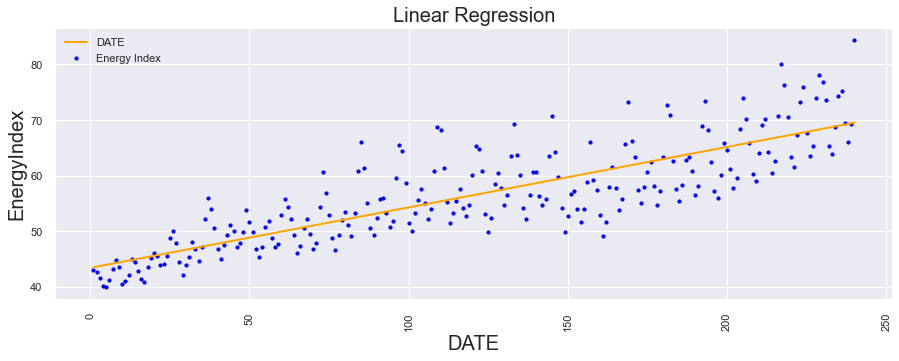

In [753]:
plt.figure(figsize=(15,5)) #sets the figure size
plt.xticks(rotation=90) #Rotates the number of months to fit better
yhat = 0.1088*x1 + 43.3914 #Estimates the values 
fig = plt.plot(x1,yhat, lw=2, c='orange',label='regression line') #Draws the regression line
plt.xlabel('DATE', fontsize=20) #X Axis title
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title
plt.scatter(x1,y, s=10, c='blue') #Sets scatter plot
plt.legend(["DATE", "Energy Index"]) #Displays a legend for the graph
plt.title('Linear Regression', fontsize =20) #Displays a Title
plt.show() #Shows the plot

In [754]:
del df['monthindex'] #Deletes the monthindex column
x1 = pd.DatetimeIndex(df['DATE']).year #The date column year only is assigned to x1
df #Displays the dataset


,DATE,EnergyIndex
0,1970-01-01,43.0869
1,1970-02-01,42.5577
2,1970-03-01,41.6215
3,1970-04-01,40.1982
4,1970-05-01,39.9321
...,...,...
235,1989-08-01,75.2704
236,1989-09-01,69.5107
237,1989-10-01,66.0620
238,1989-11-01,69.2555


Text(0.5, 1.0, 'Box Plot')

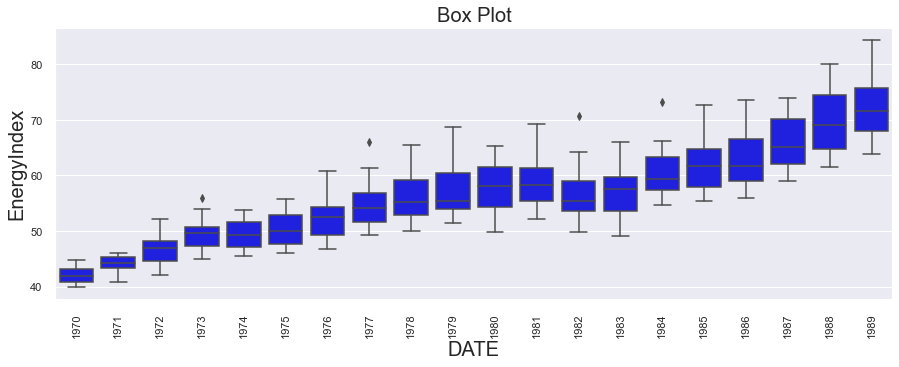

In [755]:
plt.figure(figsize=(15,5)) #sets the figure size
sns.boxplot(data = df, x=x1, y='EnergyIndex', color ='blue') #creates boxplot for energyindex and the years
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.xlabel('DATE', fontsize=20) #X Axis title
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title
plt.title('Box Plot', fontsize =20) #Displays a Title

Text(0.5, 1.0, 'Bar Plot')

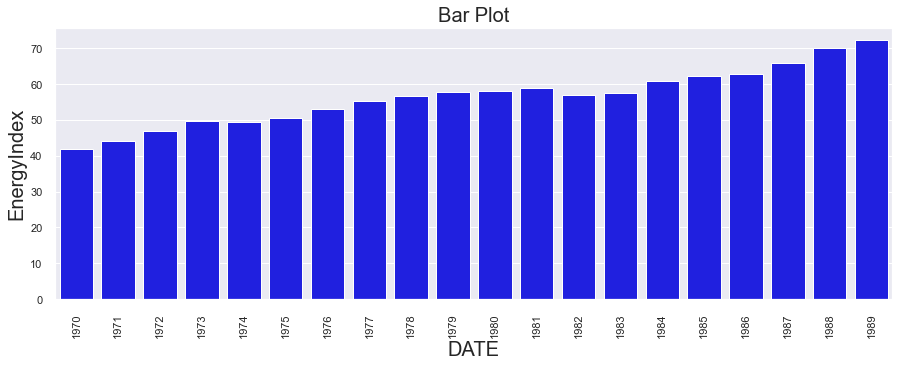

In [756]:
plt.figure(figsize=(15,5)) #sets the figure size
sns.barplot(data = df, x=x1, y='EnergyIndex', color ='blue', ci=None) #creates barplot for energyindex and the years
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.xlabel('DATE', fontsize=20) #X Axis title
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title
plt.title('Bar Plot', fontsize =20) #Displays a Title

Text(0.5, 1.0, 'Histogram Plot')

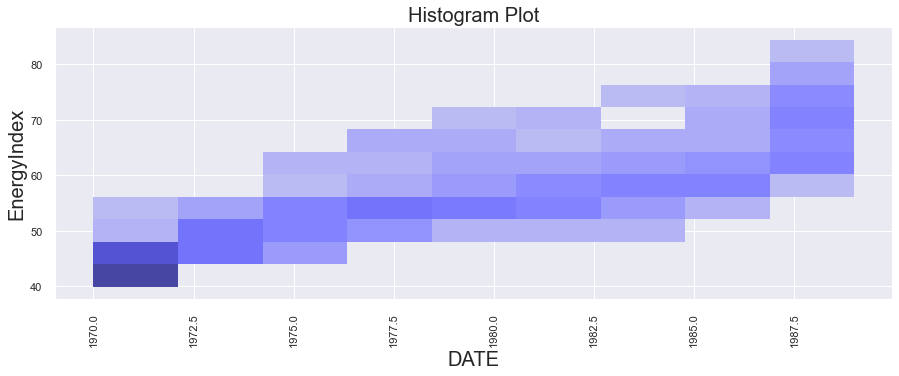

In [757]:
plt.figure(figsize=(15,5)) #sets the figure size
sns.histplot(data = df,x = x1 ,y='EnergyIndex' , color ='blue', alpha = 1) #creates histogramplot for energyindex and the years
plt.xticks(rotation=90) #Rotates the dates to fit better
plt.xlabel('DATE',fontsize =20) #X Axis title
plt.ylabel('EnergyIndex',fontsize =20) #Y Axis title
plt.title('Histogram Plot', fontsize =20) #Displays a Title